In [2]:
from sensor import IMU, StereoCamera
from ekf import ExtendedKalmanFilter
from ekf_ab import ExtendedKalmanFilter_ab
from pr3_utils import load_data, visualize_trajectory_2d
from tqdm import tqdm
import numpy as np


In [7]:
filename = "10.npz"
t, features, linear_velocity, angular_velocity, K, b, imu_T_cam = load_data(
    filename)
if filename == "10.npz":
    selected_idx = np.random.choice(
        range(features.shape[1]), int(features.shape[1]*0.6), False)
    features = features[:, selected_idx, :]


In [18]:
imu = IMU(t, linear_velocity, angular_velocity, noise_v=0.1, noise_omega=0.01)
camera = StereoCamera(K, b, features, imu_T_cam, noise=100)
ekf_ab = ExtendedKalmanFilter_ab(t.shape[1], features.shape[1], camera)


In [19]:
for i in tqdm(range(t.shape[1]-1)):  # t.shape[1]-1
    tau, u_hat, u_bhat = imu.get_data()
    ekf_ab.predict(tau, u_hat, u_bhat, imu.w)
    ekf_ab.update()
    ekf_ab.update_idx()
    imu.update_idx()
    camera.update_idx()


100%|██████████| 3025/3025 [01:25<00:00, 35.31it/s]


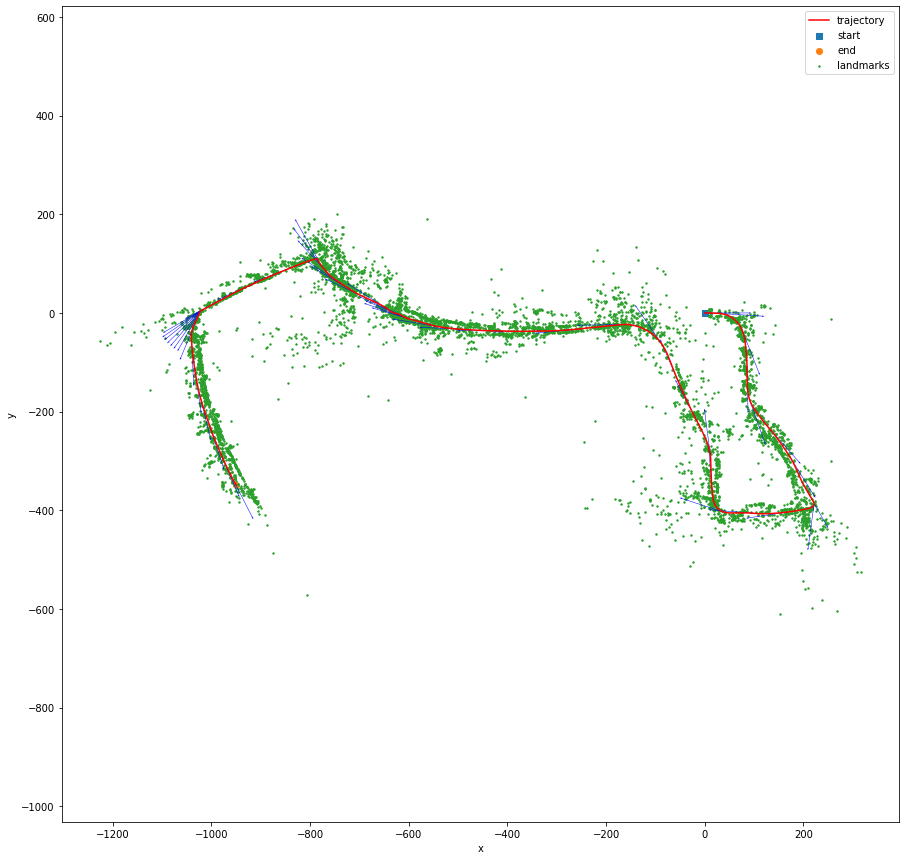

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e3aac69d0>)

In [20]:
visualize_trajectory_2d(ekf_ab.mu, ekf_ab.landmark.landmark, show_ori=True)


In [8]:
imu = IMU(t, linear_velocity, angular_velocity, noise_v=0.1, noise_omega=0.01)
camera = StereoCamera(K, b, features, imu_T_cam, noise=100)
ekf = ExtendedKalmanFilter(t.shape[1], features.shape[1], camera)


In [9]:
for i in tqdm(range(t.shape[1]-1)):
    tau, u_hat, u_bhat = imu.get_data()
    ekf.predict(tau, u_hat, u_bhat, imu.w)
    ekf.update()
    ekf.update_idx()
    imu.update_idx()
    camera.update_idx()


100%|██████████| 3025/3025 [04:18<00:00, 11.72it/s]


In [10]:
pose = ekf.mu.copy()
pose[1, :] = -pose[1, :]
landmark = ekf.landmark.landmark.copy()
landmark[1, :] = -landmark[1, :]


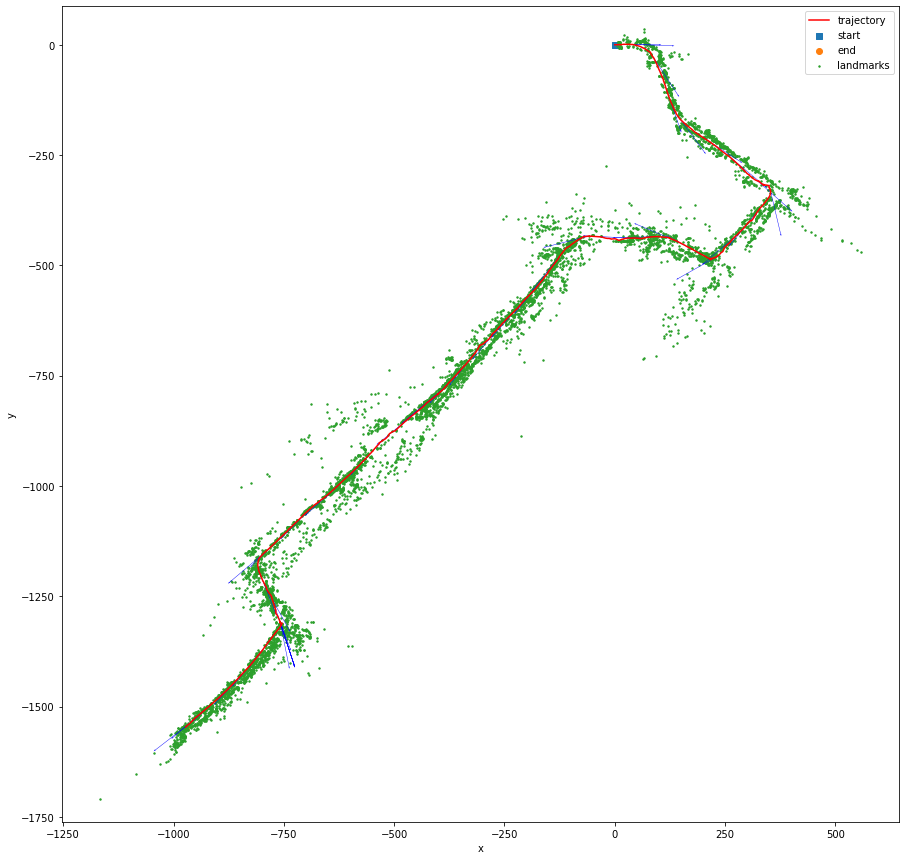

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e3e9cd490>)

In [11]:
visualize_trajectory_2d(pose, landmark, show_ori=True)


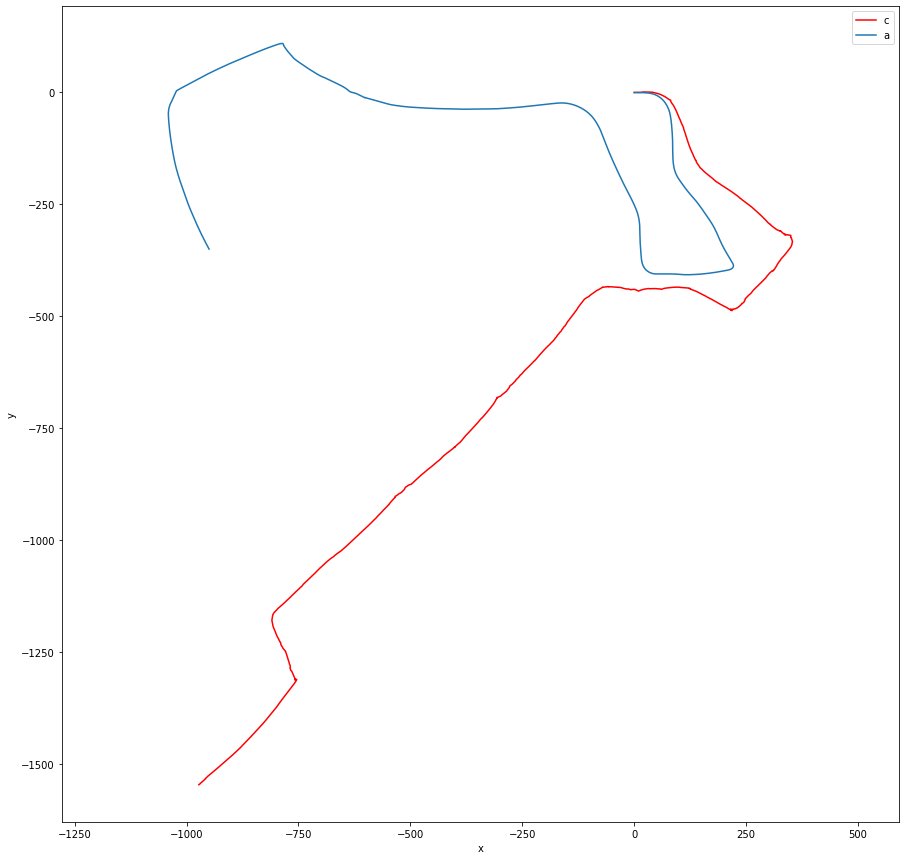

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(pose[0, 3, :], pose[1, 3, :], 'r-', label='c')
ax.plot(ekf_ab.mu[0, 3, :], ekf_ab.mu[1, 3, :], label='a')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')
ax.grid(False)
ax.legend()
